In [239]:
%matplotlib inline

import datetime as dt

import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")
from scipy.optimize import curve_fit
from scipy.optimize import minimize_scalar
import scipy.stats as stats  
import math
from pytmatrix.psd import GammaPSD

from math import gamma
# Largest Context:
#sns.set_context("talk")

#from metpy.calc import dewpoint_from_relative_humidity
#from metpy.cbook import get_test_data
#from metpy.plots import add_metpy_logo
from metpy.units import units
import xarray as xr
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import os

In [241]:
#Data Logger Data Import Cell
# Height of the station to calculate MSLP
hgt_example = 206.

def calc_mslp(t, p, h):
    return p * (1 - (0.0065 * h) / (t + 0.0065 * h + 273.15)) ** (-5.257)

testdata = pd.read_csv('/data/accp/a/snesbitt/scamp-2023/LoggerNet/SCAMPCR6_SCAMP_1min - Copy.dat',header=1).drop([0,1])
testdata2 = pd.read_csv('/data/accp/a/snesbitt/scamp-2023/LoggerNet/SCAMPCR6_SCAMP_1min.dat',header=1).drop([0,1])
testdata3 = pd.read_csv('/data/accp/a/snesbitt/scamp-2023/LoggerNet/SCAMPCR6_SCAMP_2022_1min.dat',header=1).drop([0,1])

data_all = pd.concat([testdata,testdata2,testdata3]).replace('NAN',np.nan)

data_all['Time_Eastern'] = pd.to_datetime(data_all['TIMESTAMP'])+pd.Timedelta(value=1, unit='hours')
# testdata_all=testdata_all.set_index('Time_Eastern')

timestamps_est = np.array(data_all.Time_Eastern, dtype=dt.datetime)
temp_times = np.zeros(len(timestamps_est),dtype=dt.datetime)
for i in range(len(timestamps_est)):
    temp_times[i] = timestamps_est[i]+pd.Timedelta(value=5, unit='hours')

data_all['UTC'] = temp_times
data_all=data_all.set_index('UTC')

data_all['Geonor_Freq'][185486] = float("nan")
data_all['Current_Depth'][185486] = float("nan")
data_all['Precip_Rate'][185487] = float("nan")

data_all['Geonor_Freq'][204447] = float("nan")
data_all['Current_Depth'][204447] = float("nan")
data_all['Precip_Rate'][204448] = float("nan")

data_all['Geonor_Freq'][223988] = float("nan")
data_all['Current_Depth'][223988] = float("nan")
data_all['Precip_Rate'][223989] = float("nan")

data_all['Geonor_Freq'][255972] = float("nan")
data_all['Current_Depth'][255972] = float("nan")
data_all['Precip_Rate'][255973] = float("nan")

data_all['Geonor_Freq'][256036] = float("nan")
data_all['Current_Depth'][256036] = float("nan")
data_all['Precip_Rate'][256037] = float("nan")

data_all['Geonor_Freq'][264175] = float("nan")
data_all['Current_Depth'][264175] = float("nan")
data_all['Precip_Rate'][264176] = float("nan")

data_all['Geonor_Freq'][268822] = float("nan")
data_all['Current_Depth'][268822] = float("nan")
data_all['Precip_Rate'][268823] = float("nan")

drop_spread = [
    0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.250,
    0.250, 0.250, 0.250, 0.250, 0.500, 0.500, 0.500, 0.500, 0.500, 1.000, 1.000,
    1.000, 1.000, 1.000, 2.000, 2.000, 2.000, 2.000, 2.000, 3.000, 3.000] #also delta

drop_diameter = [
    0.062, 0.187, 0.312, 0.437, 0.562, 0.687, 0.812, 0.937, 1.062, 1.187, 1.375, 1.625,
    1.875, 2.125, 2.375, 2.750, 3.25, 3.75, 4.25, 4.75, 5.5, 6.5, 7.5, 8.5, 9.5, 11, 
    13, 15, 17, 19, 21.5, 24.5] #diameters from the OTT Parsivel2 manual

/tmp/ipykernel_161788/174043443.py:9: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  testdata2 = pd.read_csv('/data/accp/a/snesbitt/scamp-2023/LoggerNet/SCAMPCR6_SCAMP_1min.dat',header=1).drop([0,1])
/tmp/ipykernel_161788/174043443.py:10: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  testdata3 = pd.read_csv('/data/accp/a/snesbitt/scamp-2023/LoggerNet/SCAMPCR6_SCAMP_2022_1min.dat',header=1).drop([0,1])
/tmp/ipykernel_161788/174043443.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_all['Geonor_Freq'][185486] = float("nan")
/tmp/ipykernel_161788/174043443.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [242]:
#2021-2022 dates
#dates = pd.date_range(start='2021-11-23',end='2022-03-02')
#Gauge dates
#dates = pd.date_range(start='2021-12-01',end='2022-03-02')

#2022-2023 dates
#dates = pd.date_range(start='2022-11-13',end='2023-03-04')

if yyyymmdd == '20220117':
    event_type = 'snow'
    dates = pd.date_range(start='2022-01-17',end='2022-01-17')
    xlimindexstart = dt.datetime.strptime('2022-01-17 03:00:00','%Y-%m-%d %H:%M:%S')
    #xlimindexend = dt.datetime.strptime('2022-01-17 5:59:00','%Y-%m-%d %H:%M:%S')
    xlimindexend = dt.datetime.strptime('2022-01-17 17:59:00','%Y-%m-%d %H:%M:%S')
elif yyyymmdd == '20221120':
    event_type = 'snow'
    dates = pd.date_range(start='2022-11-20',end='2022-11-20')
    #xlimindexstart = dt.datetime.strptime('2022-11-18 06:00:00','%Y-%m-%d %H:%M:%S')
    #xlimindexend = dt.datetime.strptime('2022-11-18 11:59:00','%Y-%m-%d %H:%M:%S')
    xlimindexstart = dt.datetime.strptime('2022-11-20 00:00:00','%Y-%m-%d %H:%M:%S')
    xlimindexend = dt.datetime.strptime('2022-11-20 23:59:00','%Y-%m-%d %H:%M:%S')
elif yyyymmdd == '20221118':
    event_type = 'snow'
    dates = pd.date_range(start='2022-11-18',end='2022-11-18')
    #xlimindexstart = dt.datetime.strptime('2022-11-18 06:00:00','%Y-%m-%d %H:%M:%S')
    #xlimindexend = dt.datetime.strptime('2022-11-18 11:59:00','%Y-%m-%d %H:%M:%S')
    xlimindexstart = dt.datetime.strptime('2022-11-18 00:00:00','%Y-%m-%d %H:%M:%S')
    xlimindexend = dt.datetime.strptime('2022-11-18 23:59:00','%Y-%m-%d %H:%M:%S')
elif yyyymmdd == '20221119':
    event_type = 'snow'
    dates = pd.date_range(start='2022-11-19',end='2022-11-19')
    #xlimindexstart = dt.datetime.strptime('2022-11-18 06:00:00','%Y-%m-%d %H:%M:%S')
    #xlimindexend = dt.datetime.strptime('2022-11-18 11:59:00','%Y-%m-%d %H:%M:%S')
    xlimindexstart = dt.datetime.strptime('2022-11-19 00:00:00','%Y-%m-%d %H:%M:%S')
    xlimindexend = dt.datetime.strptime('2022-11-19 23:59:00','%Y-%m-%d %H:%M:%S')
elif yyyymmdd == '20221225':
    event_type = 'snow'
    dates = pd.date_range(start='2022-12-25',end='2022-12-25')
    xlimindexstart = dt.datetime.strptime('2022-12-25 00:00:00','%Y-%m-%d %H:%M:%S')
    xlimindexend = dt.datetime.strptime('2022-12-25 23:59:00','%Y-%m-%d %H:%M:%S')

In [243]:
ds = xr.open_mfdataset('/data/keeling/a/mp46/Research/Processed_Data/'+idate.strftime('%Y%m%d')+'_BUFtest.nc')


drop_velocity = np.array(ds.velocity) 
drop_diameter = np.array(ds.diameter)

t1=idate
#t2=idate+pd.Timedelta(1, unit='D')
t2=idate+pd.Timedelta(hours=23,minutes=59)
gauge_mask_for_day = (data_all.index >= t1) & (data_all.index <= t2)
daily_gauge_data = data_all.loc[gauge_mask_for_day]
gauge_mask_for_pd = (daily_gauge_data.index >= xlimindexstart) & (daily_gauge_data.index <= xlimindexend)

#algorithm for data smoothing)
if gauge_mask_for_pd.sum() > 0:

    temp_gauge_data = daily_gauge_data.loc[gauge_mask_for_pd]
    temp_parsivel_rr_data = xr.DataArray.to_series(ds.avg_rainrate)
    temp_parsivel_rr_data = temp_parsivel_rr_data.loc[gauge_mask_for_pd]
    temp_parsivel_ds_spectrum = np.array(ds['spectrum'])
    parsivel_ds_spectrum = temp_parsivel_ds_spectrum[gauge_mask_for_pd]
    temp_parsivel_dsd = np.array(ds['dsd'])
    parsivel_dsd = temp_parsivel_dsd[gauge_mask_for_pd]
    temp_parsivel_IWC = np.array(ds['IWC_bins'])
    temp_parsivel_IWC = temp_parsivel_IWC[gauge_mask_for_pd]
    temp_parsivel_mass_spec = np.array(ds['raindrop_mass_spectrum_bins'])
    parsivel_mass_spec = temp_parsivel_mass_spec[gauge_mask_for_pd]
    temp_psd_dbz = np.array(ds['total_dbz'])
    psd_dbz = temp_psd_dbz[gauge_mask_for_pd]
    temp_parsivel_LWC = np.array(ds['Williams_LWC_bins'])
    parsivel_LWC = temp_parsivel_LWC[gauge_mask_for_pd]

    temp_parsivel_LWC_total = np.array(ds['Williams_LWC_total'])
    parsivel_LWC_total = temp_parsivel_LWC_total[gauge_mask_for_pd]

    thirtyminstart = xlimindexstart
    thirtyminend = thirtyminstart+pd.Timedelta(minutes=29)

    while thirtyminend <= temp_gauge_data.index[len(temp_gauge_data)-1]:

        maskminute = (temp_gauge_data.index >= thirtyminstart) & (temp_gauge_data.index <= thirtyminend)
        thirtymindata = temp_gauge_data.loc[maskminute] 
        # here, current depth is in mm
        P = np.diff(pd.to_numeric(thirtymindata['Current_Depth'],errors='coerce')) #P is in mm/min
        P = np.concatenate([[0],P],axis=0)
        #P = sorted(P)
        flaggedvalues = (pd.to_numeric(P) <= 0.05)
        for i in range(len(P)):
            #if P[i] < 0: #if P value is negative
                #   P[i] = 0 #make it equal to 0
            if flaggedvalues[i] == True: #if the value is less than 0.1
                if i == 29: #check to see if it's the last value in the 30 mins
                    if P[i] < 0.05: #if so, check to see if it's less than 0.05
                        P[i] = P[i-1] + P[i]
                        #P[i] = 0 #if so, make it O because it means it's still below the minimum threshold
                else: #if it's not the last value
                    P[i+1] = P[i+1] + P[i] #take the P value and add it to the subsequent value
                    P[i] = 0 #then make current value equal to 0
        if thirtyminstart == xlimindexstart:
            proc_precip_rate = P #in mm/min
        else:
            proc_precip_rate = np.concatenate((proc_precip_rate,P))
        thirtyminstart = thirtyminend +pd.Timedelta(minutes=1)
        thirtyminend = thirtyminstart+pd.Timedelta(minutes=29)

    precip_temp = pd.to_numeric(temp_gauge_data['Current_Depth'],errors='coerce')
    parsivel_daily_temp = np.nancumsum(temp_parsivel_rr_data/60)
    proc_daily_temp = np.nancumsum(proc_precip_rate)
    freq_temp = pd.to_numeric(temp_gauge_data['Geonor_Freq'],errors='coerce')
    date_temp = pd.to_datetime(temp_gauge_data.index) #+ dt.timedelta(hours=1)

    if idate == dates[0]:
        proc_daily = proc_daily_temp
        parsivel_daily = parsivel_daily_temp
        precip = precip_temp
        freq = freq_temp
        date = date_temp
        parsivelrr = temp_parsivel_rr_data
    else:
        proc_daily = np.concatenate((proc_daily,proc_daily_temp))
        parsivel_daily = np.concatenate((parsivel_daily,parsivel_daily_temp))
        precip = np.concatenate((precip,precip_temp))
        freq = np.concatenate((freq,freq_temp))
        proc_precip_rate = proc_precip_rate
        date = np.concatenate((date,date_temp))
        parsivelrr = np.concatenate((parsivelrr,temp_parsivel_rr_data))

#################################################################################################################################################################        
    
    def power_law(x, a, b):
        return a*np.power(x, b)

    summed_spectrum = parsivel_ds_spectrum.sum(axis=0)
    separate_diameters = []
    separate_velocities = []

    time_labels = np.array(date)

    snow_upper_limit = 0.8*np.power(drop_diameter, 0.16) + 1
    snow_lower_limit = 0.8*np.power(drop_diameter, 0.16) - 1
    rain_upper_limit = 17.67*np.power(drop_diameter/10, 0.67) + 1 
    rain_lower_limit = 17.67*np.power(drop_diameter/10, 0.67) - 1

    if event_type == 'snow':
        rain_dict_temp = {}

        for d,u,l in zip(range(len(drop_diameter)), rain_upper_limit, rain_lower_limit):
            rain_indis = np.where( (drop_velocity>l))
            rain_dict_temp[d] = rain_indis

        rain_indi_pairs_2D = []
        for rain_diam, rain_indis in rain_dict_temp.items():
            for i in rain_indis[0]:
                if summed_spectrum[i, rain_diam] > 0:
                    rain_indi_pairs_2D.append((rain_diam,i))

        rain_triple_time_dia_vel = []

        for i, j in rain_indi_pairs_2D:
            local_dia = drop_diameter[i]
            local_veloc = drop_velocity[j]
            times = parsivel_ds_spectrum[:,j,i]
            time_indis = np.where(times>0)
            for t in time_indis[0]:
                rain_triple_time_dia_vel.append((local_dia,local_veloc,time_labels[t]))

        rain_triple_time_dia_vel = np.array(rain_triple_time_dia_vel)

        ####################################################################

        snow_dict_temp = {}

        for d,u,l in zip(range(len(drop_diameter)), snow_upper_limit, snow_lower_limit):
            snow_indis = np.where((drop_velocity<u) & (drop_velocity>l))
            snow_dict_temp[d] = snow_indis

        snow_indi_pairs_2D = []
        for snow_diam, snow_indis in snow_dict_temp.items():
            for i in snow_indis[0]:
                if summed_spectrum[i, snow_diam] > 0:
                    snow_indi_pairs_2D.append((snow_diam,i))

        snow_triple_time_dia_vel = []

        for i, j in snow_indi_pairs_2D:
            local_dia = drop_diameter[i]
            local_veloc = drop_velocity[j]
            times = parsivel_ds_spectrum[:,j,i]
            time_indis = np.where(times>0)
            for t in time_indis[0]:
                snow_triple_time_dia_vel.append((local_dia,local_veloc,time_labels[t]))

        snow_triple_time_dia_vel = np.array(snow_triple_time_dia_vel)

        ########################################################################################

        mixed_dict_temp = {}

        for d,u,l in zip(range(len(drop_diameter)), snow_upper_limit, rain_lower_limit):
            mixed_indis = np.where((drop_velocity>u) & (drop_velocity<l))
            mixed_dict_temp[d] = mixed_indis

        mixed_indi_pairs_2D = []
        for mixed_diam, mixed_indis in mixed_dict_temp.items():
            for i in mixed_indis[0]:
                if summed_spectrum[i, mixed_diam] > 0:
                    mixed_indi_pairs_2D.append((mixed_diam,i))

        mixed_triple_time_dia_vel = []

        for i, j in mixed_indi_pairs_2D:
            local_dia = drop_diameter[i]
            local_veloc = drop_velocity[j]
            times = parsivel_ds_spectrum[:,j,i]
            time_indis = np.where(times>0)
            for t in time_indis[0]:
                mixed_triple_time_dia_vel.append((local_dia,local_veloc,time_labels[t]))

        mixed_triple_time_dia_vel = np.array(mixed_triple_time_dia_vel)

        ########################################################################################

        unknown_dict_temp = {}

        for d,u,l,rl in zip(range(len(drop_diameter)), snow_upper_limit, snow_lower_limit, rain_lower_limit):
            unknown_indis = np.where((drop_velocity>rl) & (l<drop_velocity) & (drop_velocity<u))
            unknown_dict_temp[d] = unknown_indis

        unknown_indi_pairs_2D = []
        for unknown_diam, unknown_indis in unknown_dict_temp.items():
            for i in unknown_indis[0]:
                if summed_spectrum[i, unknown_diam] > 0:
                    unknown_indi_pairs_2D.append((unknown_diam,i))

        unknown_triple_time_dia_vel = []

        for i, j in unknown_indi_pairs_2D:
            local_dia = drop_diameter[i]
            local_veloc = drop_velocity[j]
            times = parsivel_ds_spectrum[:,j,i]
            time_indis = np.where(times>0)
            for t in time_indis[0]:
                unknown_triple_time_dia_vel.append((local_dia,local_veloc,time_labels[t]))

        unknown_triple_time_dia_vel = np.array(unknown_triple_time_dia_vel)

        ################################################################################################################################################################################
        
        # Fit the power-law data
        snow_pars, snow_cov = curve_fit(f=power_law, xdata=snow_triple_time_dia_vel[:,0]/1000, ydata=snow_triple_time_dia_vel[:,1], p0=[0.006, 0.05], bounds=(0, [np.inf, 1]), check_finite=False)
        # Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
        snow_stdevs = np.sqrt(np.diag(snow_cov))
        # Calculate the residuals
        snow_res = ds.velocity - power_law(ds.diameter, *snow_pars)

        rain_pars, rain_cov = curve_fit(f=power_law, xdata=rain_triple_time_dia_vel[:,0]/1000, ydata=rain_triple_time_dia_vel[:,1], p0=[0.006, 0.05], bounds=(0, [np.inf, 1]), check_finite=False)
        # Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
        rain_stdevs = np.sqrt(np.diag(rain_cov))
        # Calculate the residuals
        rain_res = ds.velocity - power_law(ds.diameter, *rain_pars)

        snow_power_law_vt = snow_pars[0]*np.power(ds.diameter/1000, snow_pars[1])
        snow_power_law_vt = np.array(snow_power_law_vt)
        snow_power_law_vt = np.reshape(np.array(snow_power_law_vt),(1,-1))

        rain_power_law_vt = rain_pars[0]*np.power(ds.diameter/1000, rain_pars[1])
        rain_power_law_vt = np.array(rain_power_law_vt)
        rain_power_law_vt = np.reshape(np.array(rain_power_law_vt),(1,-1))

        ###############################################################################

    else:
        rain_dict_temp = {}

        for d,u,l in zip(range(len(drop_diameter)), rain_upper_limit, rain_lower_limit):
            rain_indis = np.where( (drop_velocity>0))
            rain_dict_temp[d] = rain_indis

        rain_indi_pairs_2D = []
        for rain_diam, rain_indis in rain_dict_temp.items():
            for i in rain_indis[0]:
                if summed_spectrum[i, rain_diam] > 0:
                    rain_indi_pairs_2D.append((rain_diam,i))

        rain_triple_time_dia_vel = []

        for i, j in rain_indi_pairs_2D:
            local_dia = drop_diameter[i]
            local_veloc = drop_velocity[j]
            times = parsivel_ds_spectrum[:,j,i]
            time_indis = np.where(times>0)
            for t in time_indis[0]:
                rain_triple_time_dia_vel.append((local_dia,local_veloc,time_labels[t]))

        rain_triple_time_dia_vel = np.array(rain_triple_time_dia_vel)

        rain_pars, rain_cov = curve_fit(f=power_law, xdata=rain_triple_time_dia_vel[:,0]/1000, ydata=rain_triple_time_dia_vel[:,1], p0=[0.006, 0.05], bounds=(0, [np.inf, 1]), check_finite=False)
        # Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
        rain_stdevs = np.sqrt(np.diag(rain_cov))
        # Calculate the residuals
        rain_res = ds.velocity - power_law(ds.diameter, *rain_pars)

        rain_power_law_vt = rain_pars[0]*np.power(ds.diameter/1000, rain_pars[1])
        rain_power_law_vt = np.array(rain_power_law_vt)
        rain_power_law_vt = np.reshape(np.array(rain_power_law_vt),(1,-1))

    # Locatelli and Hobbs 1974, snow
    LH_unrimed_aggs_vt = 0.8*np.power(ds.diameter, 0.16)
    LH_rimed_aggs_vt = 0.79*np.power(ds.diameter, 0.27)

    # Rosenow et al 2014, snow

    # Beard 1976, rain
    # v = dynamic viscosity*Reynolds number/fluid density*equivalent spherical diameter
    # Gunn and Kinzer, 1949

    # Atlas and Ulbrich, 1977, rain
    Atlas_and_Ulbrich_rain = 17.67*np.power(ds.diameter/10, 0.67)

    # Uplinger 1981, as described in Serio et al, 2019
    Uplinger_rain = 48.74*ds.diameter/10*np.exp(-1.95*(ds.diameter/10))

    # Leone and Pica 1993 using vt measurements from Beard 1976 and Gunnn and Kinzer 1949, as described in Serio et al, 2019
    Leone_and_Pica_rain = 49*ds.diameter/10*np.exp(-2*(ds.diameter/10))

#################################################################################################################################################################
    

    if yyyymmdd == '20220117':
        #rainrate_total = np.zeros((len(temp_parsivel_IWC),))
        #rainrate_bins = np.multiply(np.array(rain_power_law_vt[0,4]),parsivel_LWC[:,0:4]) #where LWC is in g/m^3 and velocity is in m/s
        #preciprate_bins = np.array(lwc_and_vt)
        #preciprate_bins = np.multiply(preciprate_bins,3.6) # divide by 1000 to get g into kg, multiply by 3600 to get s into hr

        #snowrate_bins = np.multiply(temp_parsivel_IWC[:,4:32], np.array(snow_power_law_vt[0,4:32]))
        #preciprate_bins = np.hstack((rainrate_bins,snowrate_bins))
        
        #preciprate_bins = np.multiply(preciprate_bins,3.6)
        #preciprate_total = preciprate_bins.sum(axis=1)
        #preciprate_accumulation = np.nancumsum(preciprate_total/60)

        preciprate_bins = np.zeros((len(temp_parsivel_IWC),32))
        IWC_conditions = temp_parsivel_IWC.sum(axis=1)
        for i in range(len(temp_parsivel_IWC)):
            if IWC_conditions[i] < 0.1:
                preciprate_bins[i] = np.multiply(np.array(rain_power_law_vt),parsivel_LWC[i,:]) #where LWC is in g/m^3 and velocity is in m/s
                #preciprate_bins[i] = np.array(lwc_and_vt)
                #preciprate_bins[i] = np.multiply(preciprate_bins,3.6) # divide by 1000 to get g into kg, multiply by 3600 to get s into hr
            else:
                preciprate_bins[i] = np.multiply(temp_parsivel_IWC[i,:], np.array(snow_power_law_vt))
        preciprate_bins = np.multiply(preciprate_bins,3.6)
        preciprate_total = preciprate_bins.sum(axis=1)
        preciprate_accumulation = np.nancumsum(preciprate_total/60)
    else:
        snowrate_bins = np.multiply(temp_parsivel_IWC, np.array(snow_power_law_vt))
        snowrate_bins = np.multiply(snowrate_bins,3600/1000)
        preciprate_total = snowrate_bins.sum(axis=1)
        preciprate_accumulation = np.nancumsum(preciprate_total/60)

    #Matrosov
    Matrosov_reflectivity = np.multiply(56,np.power(preciprate_total,1.2))
    Matrosov_reflectivity_factor = np.multiply(10,np.log10(Matrosov_reflectivity))

    #MRMS
    MRMS_reflectivity = np.multiply(75,np.power(preciprate_total,2))
    MRMS_reflectivity_factor = np.multiply(10,np.log10(MRMS_reflectivity))

    #Holroyd 1999
    Holroyd_reflectivity = np.multiply(150,np.power(preciprate_total,2))
    Holroyd_reflectivity_factor = np.multiply(10,np.log10(Holroyd_reflectivity))

    WS_Cleveland_reflectivity =  np.multiply(304,np.power(preciprate_total,2))
    WS_Cleveland_reflectivity_factor = np.multiply(10,np.log10(WS_Cleveland_reflectivity))

    WS_Albany_reflectivity =  np.multiply(304,np.power(preciprate_total,2))
    WS_Albany_reflectivity_factor = np.multiply(10,np.log10(WS_Albany_reflectivity))

#################################################################################################################################################################   

data = pd.DataFrame({'Current Depth': np.array(precip),
        'Processed Gauge Precip Rate': np.array(proc_precip_rate*60)* units('mm/hr'),
        'Processed Gauge Precip Accumulation': np.array(proc_daily)* units('mm'),
        'Parsivel Rainrate': np.array(parsivelrr/6)* units('mm/hr'),
        'Parsivel Precip Accumulation': np.array(parsivel_daily/6),
        'Calculated Parsivel Rainrate': np.array(preciprate_total)* units('mm/hr'),
        'Calculated Parsivel Accumulation': np.array(preciprate_accumulation),
        'times': np.array(date),
        'Frequency': np.array(freq)})
data.index=date


/tmp/ipykernel_161788/3315852034.py:346: RuntimeWarning: divide by zero encountered in log10
  Matrosov_reflectivity_factor = np.multiply(10,np.log10(Matrosov_reflectivity))
/tmp/ipykernel_161788/3315852034.py:350: RuntimeWarning: divide by zero encountered in log10
  MRMS_reflectivity_factor = np.multiply(10,np.log10(MRMS_reflectivity))
/tmp/ipykernel_161788/3315852034.py:354: RuntimeWarning: divide by zero encountered in log10
  Holroyd_reflectivity_factor = np.multiply(10,np.log10(Holroyd_reflectivity))
/tmp/ipykernel_161788/3315852034.py:357: RuntimeWarning: divide by zero encountered in log10
  WS_Cleveland_reflectivity_factor = np.multiply(10,np.log10(WS_Cleveland_reflectivity))
/tmp/ipykernel_161788/3315852034.py:360: RuntimeWarning: divide by zero encountered in log10
  WS_Albany_reflectivity_factor = np.multiply(10,np.log10(WS_Albany_reflectivity))
/tmp/ipykernel_161788/3315852034.py:400: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match

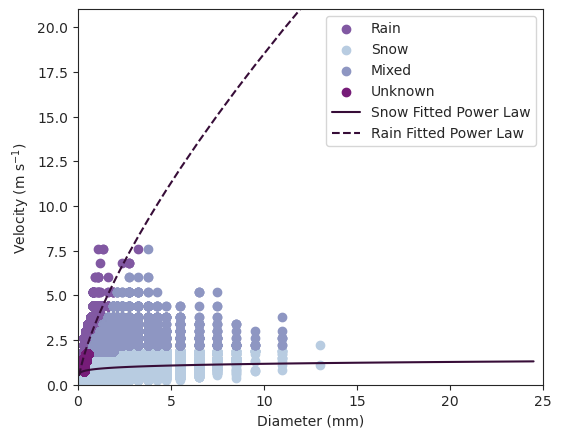

In [250]:
fig = plt.figure(figsize=(6,4.875))

#ax=fig.subplots(nrows=1,ncols=1,sharex=True)

if event_type == 'snow':
    plt.scatter(rain_triple_time_dia_vel[:,0],rain_triple_time_dia_vel[:,1], label = 'Rain', color = '#8158a2')
    plt.scatter(snow_triple_time_dia_vel[:,0],snow_triple_time_dia_vel[:,1], label = 'Snow', color = '#b8cce1')
    plt.scatter(mixed_triple_time_dia_vel[:,0],mixed_triple_time_dia_vel[:,1], label = 'Mixed', color = '#8e96c2')
    plt.scatter(unknown_triple_time_dia_vel[:,0],unknown_triple_time_dia_vel[:,1], label = 'Unknown', color = '#761c78')
    
    plt.plot(ds.diameter,(snow_pars[0])*np.power(ds.diameter/1000, snow_pars[1]), color = '#370D38', linestyle='solid', label = 'Snow Fitted Power Law')
    plt.plot(ds.diameter,(rain_pars[0])*np.power(ds.diameter/1000, rain_pars[1]), color='#370D38', linestyle='dashed', label = 'Rain Fitted Power Law')
    #plt.plot(ds.diameter,0.8*np.power(ds.diameter, 0.16), color='#2F353D', label = 'Locatelli & Hobbs (1974) \n- Unrimed Dendrites')
    plt.legend()
    plt.xlabel('Diameter (mm)')
    plt.ylabel('Velocity (m s$^{-1}$)')

    plt.ylim(0,21)
    plt.xlim(0,25)

else:
    plt.scatter(rain_triple_time_dia_vel[:,0],rain_triple_time_dia_vel[:,1], color = '#8158a2')
    plt.plot(ds.diameter,(rain_pars[0])*np.power(ds.diameter/1000, rain_pars[1]), color = '#370D38', linestyle='solid', label = 'Fitted Power Law')
    plt.plot(ds.diameter,17.67*np.power(ds.diameter/10, 0.67), color = '#370D38', linestyle='dashed', label = 'Atlas and Ulbrich 1977')
    plt.legend()
    plt.xlabel('Diameter (mm)')
    plt.ylabel('Velocity (m s$^{-1}$)')

    plt.ylim(0,20.8)
    plt.xlim(0,25)

savedimage = '/data/keeling/a/mp46/Research/Saved_Images/Gauge_Parsivel_Rain_Cases/SingleScatterParsivel_Vt_vs_Diameter_BUF_'+yyyymmdd+'.png'
plt.savefig(savedimage,dpi=150)
